In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("Project1.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 4 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            944 non-null    object 
 1   Code                                                                              748 non-null    object 
 2   Year                                                                              944 non-null    int64  
 3   Prevalence of moderate or severe food insecurity in the total population (%age)   944 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.6+ KB


In [4]:
data

,Entity,Code,Year,Prevalence of moderate or severe food insecurity in the total population (%age)
0,Afghanistan,AFG,2015,45.1
1,Afghanistan,AFG,2016,49.6
2,Afghanistan,AFG,2017,54.3
3,Afghanistan,AFG,2018,57.5
4,Afghanistan,AFG,2019,63.1
...,...,...,...,...
939,Zimbabwe,ZWE,2016,66.7
940,Zimbabwe,ZWE,2017,67.0
941,Zimbabwe,ZWE,2018,66.7
942,Zimbabwe,ZWE,2019,69.8


Index(['Entity', 'Code', 'Year',
       'Prevalence of moderate or severe food insecurity in the total population (%age)'],
      dtype='object')


Enter the country name:  Zimbabwe



Predicted scores for Zimbabwe for the years [2021, 2022, 2023, 2024, 2025]:
Year 2021: 80.80%
Year 2022: 93.09%
Year 2023: 111.23%
Year 2024: 136.40%
Year 2025: 169.76%

Model Accuracy (R² Score): 0.9746


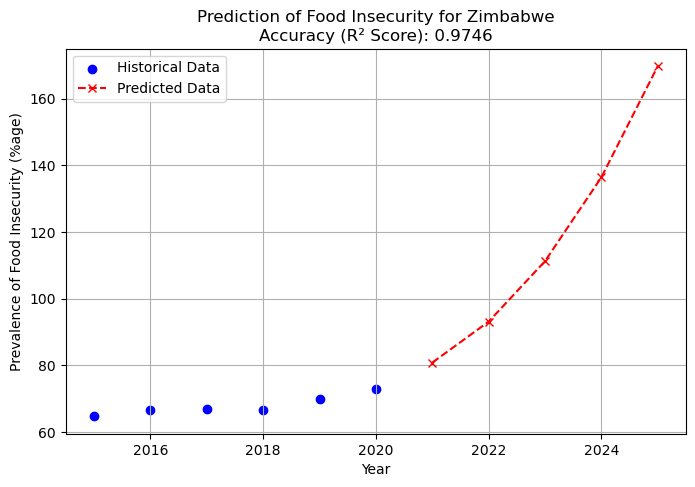

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.DataFrame(data)
df.columns = df.columns.str.strip()
print(df.columns)

def predict_score_for_country(df, future_years, degree=2):
    country_name = input("Enter the country name: ")
    country_data = df[df['Entity'] == country_name]

    if country_data.shape[0] < 3: 
        print("Not enough data to make accurate predictions.")
        return None, None, None, None

    X = country_data[['Year']].values
    y = country_data['Prevalence of moderate or severe food insecurity in the total population (%age)'].astype(float).values

    poly = PolynomialFeatures(degree=degree)  
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)  

    future_X = np.array(future_years).reshape(-1, 1)
    future_X_poly = poly.transform(future_X)
    future_predictions = model.predict(future_X_poly)

    print(f"\nPredicted scores for {country_name} for the years {future_years}:")
    for year, prediction in zip(future_years, future_predictions):
        print(f"Year {year}: {prediction:.2f}%")
    
    print(f"\nModel Accuracy (R² Score): {r2:.4f}")

    return country_data, future_years, future_predictions, r2

def plot_predictions(country_data, future_years, future_predictions, r2):
    if country_data is None:
        print("No data to plot.")
        return

    plt.figure(figsize=(8, 5))
    plt.scatter(country_data['Year'], country_data['Prevalence of moderate or severe food insecurity in the total population (%age)'], 
                label='Historical Data', color='blue', marker='o')
    
    plt.plot(future_years, future_predictions, label='Predicted Data', marker='x', linestyle='--', color='red')

    plt.xlabel('Year')
    plt.ylabel('Prevalence of Food Insecurity (%age)')
    plt.title(f'Prediction of Food Insecurity for {country_data["Entity"].iloc[0]}\nAccuracy (R² Score): {r2:.4f}')
    plt.legend()
    plt.grid(True)
    plt.savefig("food_insecurity_prediction.png")
    plt.show()

future_years = [2021, 2022, 2023, 2024, 2025]
country_data, future_years, future_predictions, r2 = predict_score_for_country(df, future_years, degree=3) 
plot_predictions(country_data, future_years, future_predictions, r2)
